In [2]:
#import libraries
import pandas as pd
print('pandas: %s' % pd.__version__)

import xarray as xr
print('xarray: %s' % xr.__version__)

pd.options.display.max_columns = None
pd.set_option('display.max_rows', 150)

import numpy as np
print('geopandas: %s' % np.__version__)


# tensorflow
import tensorflow as tf
print('tensorflow: %s' % tf.__version__)

# Tensorflow / Keras
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras.models import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense # for creating regular densely-connected NN layer.

# Data manipulation
import pandas as pd # for data manipulation
print('pandas: %s' % pd.__version__) # print version
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version

# Sklearn
import sklearn # for model evaluation
print('sklearn: %s' % sklearn.__version__) # print version
from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics

# Visualization
import plotly 
import plotly.express as px
import plotly.graph_objects as go
print('plotly: %s' % plotly.__version__) # print version

# Other utilities
import sys
import os

# Assign main directory to a variable
main_dir=os.path.dirname(sys.path[0])
print(main_dir)

pandas: 1.3.5
xarray: 0.20.1
geopandas: 1.21.5
tensorflow: 2.0.0
Tensorflow/Keras: 2.2.4-tf
pandas: 1.3.5
numpy: 1.21.5
sklearn: 1.0.2
plotly: 5.6.0
/Users/3rfanian/P_main


Using TensorFlow backend.


In [3]:
test_set = pd.read_csv('data_with_newtarget/test_set_with_newtarget.csv')
validation_set = pd.read_csv('data_with_newtarget/validation_set_with_newtarget.csv')
traning_set = pd.read_csv('data_with_newtarget/traning_set_with_newtarget.csv')


In [4]:
print("this is traning set")
print(traning_set)
print("this is validation set")
print(validation_set)
print("this is test set")
print(test_set)



this is traning set
         Unnamed: 0        time  latitude  longitude        vo          r  \
0                 0  1980-01-01       0.0       20.0  0.000007  80.761185   
1                 1  1980-01-01       0.0       22.5  0.000004  80.703650   
2                 2  1980-01-01       0.0       25.0  0.000007  78.231514   
3                 3  1980-01-01       0.0       27.5  0.000010  79.631010   
4                 4  1980-01-01       0.0       30.0  0.000010  71.573875   
...             ...         ...       ...        ...       ...        ...   
4268766      137600  2010-12-31     -30.0       80.0  0.000015  26.797535   
4268767      137601  2010-12-31     -30.0       82.5 -0.000006  27.766910   
4268768      137602  2010-12-31     -30.0       85.0  0.000010  29.111805   
4268769      137603  2010-12-31     -30.0       87.5  0.000006  27.833050   
4268770      137604  2010-12-31     -30.0       90.0  0.000007  15.843884   

             u_200     u_850      v_200     v_850      

In [5]:
traning_df = traning_set['newlsm']
traning_df
ndf = traning_df.iloc[1:]
ndf.loc[4268771,] = 0.0
nd = ndf.reset_index()
del nd["index"]
nd =nd.rename(columns={'newlsm': 'Tomorrow_lsm'})
df2 = traning_set.assign(Tomorrow_lsm=nd)
del df2["Unnamed: 0"]
df2

,time,latitude,longitude,vo,r,u_200,u_850,v_200,v_850,ttr,sst,lsm,newlsm,Tomorrow_lsm
0,1980-01-01,0.0,20.0,0.000007,80.761185,1.909660,-3.323872,1.687164,-1.823624,-247.54074,0.00000,0.0,0.0,0.0
1,1980-01-01,0.0,22.5,0.000004,80.703650,1.165733,-2.844494,1.060593,-1.991425,-240.00592,0.00000,0.0,0.0,0.0
2,1980-01-01,0.0,25.0,0.000007,78.231514,-1.311676,-2.125244,3.280617,-1.931789,-223.76889,0.00000,0.0,0.0,0.0
3,1980-01-01,0.0,27.5,0.000010,79.631010,-3.777573,-1.122395,5.743889,-1.243538,-235.55556,0.00000,0.0,0.0,0.0
4,1980-01-01,0.0,30.0,0.000010,71.573875,-5.734505,-1.362953,6.514030,-0.954163,-254.03260,0.00000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4268766,2010-12-31,-30.0,80.0,0.000015,26.797535,25.075424,-3.653679,-1.221291,1.515594,-273.34204,296.89227,0.0,0.0,0.0
4268767,2010-12-31,-30.0,82.5,-0.000006,27.766910,24.175919,-2.866638,-6.724304,0.861771,-280.37018,296.03314,0.0,0.0,0.0
4268768,2010-12-31,-30.0,85.0,0.000010,29.111805,24.655510,-2.809170,-10.138817,0.051220,-281.05167,295.36078,0.0,0.0,0.0
4268769,2010-12-31,-30.0,87.5,0.000006,27.833050,25.088104,-2.730087,-11.036507,0.666927,-280.05610,295.10638,0.0,0.0,0.0


In [6]:
validation_df = validation_set['newlsm']
ndf_val = validation_df.iloc[1:]
ndf_val.loc[688402,] = 0.0
nd_val = ndf_val.reset_index()
del nd_val["index"]
nd_val =nd_val.rename(columns={'newlsm': 'Tomorrow_lsm'})
df3 = validation_set.assign(Tomorrow_lsm=nd_val)
del df3["Unnamed: 0"]
df3

,time,latitude,longitude,vo,r,u_200,u_850,v_200,v_850,ttr,sst,lsm,newlsm,Tomorrow_lsm
0,2011-01-01,0.0,20.0,0.000003,73.016390,-5.760780,-4.216808,6.860649,-4.352928,-212.59741,0.00000,0.0,0.0,0.0
1,2011-01-01,0.0,22.5,0.000003,74.569660,-4.942451,-3.857407,6.459419,-3.991157,-198.23593,0.00000,0.0,0.0,0.0
2,2011-01-01,0.0,25.0,0.000004,80.080090,-3.848740,-3.175144,6.303680,-3.446140,-195.83296,0.00000,0.0,0.0,0.0
3,2011-01-01,0.0,27.5,0.000012,83.676704,0.330811,-2.526569,7.235268,-2.307594,-191.47444,0.00000,0.0,0.0,0.0
4,2011-01-01,0.0,30.0,0.000011,76.225440,3.678749,-1.027561,7.020271,-0.077572,-191.98111,0.00000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688397,2015-12-31,-30.0,80.0,0.000014,70.662056,23.560066,1.655861,9.690376,3.621418,-271.57556,296.77530,0.0,0.0,0.0
688398,2015-12-31,-30.0,82.5,-0.000006,51.213654,22.381706,0.321705,9.860390,-0.099480,-269.94592,296.44290,0.0,0.0,0.0
688399,2015-12-31,-30.0,85.0,0.000009,46.678970,22.464828,0.851299,7.661758,-0.725330,-270.18890,295.73486,0.0,0.0,0.0
688400,2015-12-31,-30.0,87.5,0.000002,59.362090,22.364807,0.543045,5.595253,-1.542034,-264.07333,295.24792,0.0,0.0,0.0


In [7]:
test_df = test_set['newlsm']
ndf_test = test_df.iloc[1:]
ndf_test.loc[539487,] = 0.0
nd_test = ndf_test.reset_index()
del nd_test["index"]
nd_test =nd_test.rename(columns={'newlsm': 'Tomorrow_lsm'})
df4 = test_set.assign(Tomorrow_lsm=nd_test)
del df4["Unnamed: 0"]
df4

,time,latitude,longitude,vo,r,u_200,u_850,v_200,v_850,ttr,sst,lsm,newlsm,Tomorrow_lsm
0,2016-01-01,0.0,20.0,0.000011,80.796135,-2.052292,0.008678,4.996910,-1.678764,-272.04962,0.00000,0.0,0.0,0.0
1,2016-01-01,0.0,22.5,0.000011,77.748420,-4.445312,0.740505,7.517281,0.792618,-250.63333,0.00000,0.0,0.0,0.0
2,2016-01-01,0.0,25.0,-0.000001,71.178825,-3.778427,1.056324,9.333221,0.688252,-229.52519,0.00000,0.0,0.0,0.0
3,2016-01-01,0.0,27.5,-0.000005,73.585754,-4.695709,1.236446,9.589882,0.555519,-240.80815,0.00000,0.0,0.0,0.0
4,2016-01-01,0.0,30.0,-0.000016,72.382780,-4.002563,0.734211,5.410950,-1.086350,-262.45557,0.00000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539482,2019-12-01,-30.0,80.0,0.000006,2.637233,33.277840,5.379345,-0.286896,5.558327,-277.60870,294.14987,0.0,0.0,0.0
539483,2019-12-01,-30.0,82.5,-0.000020,23.660923,34.272537,6.438683,-13.026535,2.857349,-270.80573,294.23798,0.0,0.0,0.0
539484,2019-12-01,-30.0,85.0,-0.000019,46.051540,35.755882,7.248966,-18.870102,-3.349407,-249.43092,294.26890,0.0,0.0,0.0
539485,2019-12-01,-30.0,87.5,-0.000014,55.855648,34.069664,6.349327,-18.801796,-8.172478,-239.36870,294.36630,0.0,0.0,0.0


In [8]:
training_set_wt = df2
validation_set_wt =df3
test_set_wt = df4


In [9]:
##### Step 2 - Split training data
x_training = training_set_wt[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']]
print ("******training features******")
print (x_training)
y_training = training_set_wt[['Tomorrow_lsm']]
print ("******training target******")
print (y_training)

##### Step 3 - Split test data
x_test = test_set_wt[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']]
print ("******test features******")
print (x_test)
y_test = test_set_wt[['Tomorrow_lsm']]
print ("******test target******")
print (y_test)

##### Step 4 - Split validation data
x_validation = validation_set_wt[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']]
print ("******validation features******")
print (x_validation)
y_validation = validation_set_wt[['Tomorrow_lsm']]
print ("******validation target******")
print (y_validation)

******training features******
               vo          r      u_200     u_850      v_200     v_850  \
0        0.000007  80.761185   1.909660 -3.323872   1.687164 -1.823624   
1        0.000004  80.703650   1.165733 -2.844494   1.060593 -1.991425   
2        0.000007  78.231514  -1.311676 -2.125244   3.280617 -1.931789   
3        0.000010  79.631010  -3.777573 -1.122395   5.743889 -1.243538   
4        0.000010  71.573875  -5.734505 -1.362953   6.514030 -0.954163   
...           ...        ...        ...       ...        ...       ...   
4268766  0.000015  26.797535  25.075424 -3.653679  -1.221291  1.515594   
4268767 -0.000006  27.766910  24.175919 -2.866638  -6.724304  0.861771   
4268768  0.000010  29.111805  24.655510 -2.809170 -10.138817  0.051220   
4268769  0.000006  27.833050  25.088104 -2.730087 -11.036507  0.666927   
4268770  0.000007  15.843884  24.510345 -3.213837 -10.213325 -0.098499   

               ttr        sst  
0       -247.54074    0.00000  
1       -240.0059

In [10]:
##### Step 5 - Specify the structure of a Neural Network
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(8,)),
    tf.keras.layers.Dense(8, activation='tanh', name='Hidden-Layer'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid', name='Output-Layer')
])
model.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

model.fit(x_training, y_training, epochs = 1 ,  validation_data=(x_validation, y_validation))#*********more epochs = 5


2022-06-13 17:00:32.192996: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-13 17:00:32.195065: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train on 4268771 samples, validate on 688402 samples
4268771/4268771 [==============================] - 194s 45us/sample - loss: 0.0236 - accuracy: 0.9962 - val_loss: 0.0187 - val_accuracy: 0.9969


In [11]:
##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr = (model.predict(x_training)> 0.01).astype(int)
# Predict class labels on a test data
pred_labels_te = (model.predict(x_test)> 0.01).astype(int)
#> 0.01).astype(int)

##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
for layer in model.layers:
    print("Layer: ", layer.name) # print layer name
    
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_training, pred_labels_tr))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te))
print("")




-------------------- Model Summary --------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 8)                 0         
_________________________________________________________________
Hidden-Layer (Dense)         (None, 8)                 72        
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
Output-Layer (Dense)         (None, 1)                 9         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________

-------------------- Weights and Biases --------------------
Layer:  flatten
Layer:  Hidden-Layer
Layer:  dropout
Layer:  Output-Layer

---------- Evaluation on Training Data ----------
              

In [42]:
dfq12.to_csv('data_with_newtarget/prediction_value_newtarget_and_tommorowclass.csv')  


In [48]:
neee = dfq12.groupby(['predict_class']).count()

In [49]:
neee.to_csv('data_with_newtarget/groupbyprob_count.csv')  


In [13]:
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt


#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, pred_labels_te)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Tropical cyclones Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Tropical cyclones Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


[[522587  15145]
 [  1126    629]]


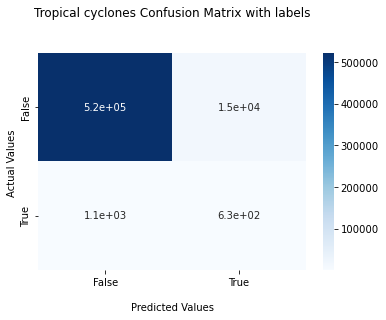

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Tropical cyclones Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

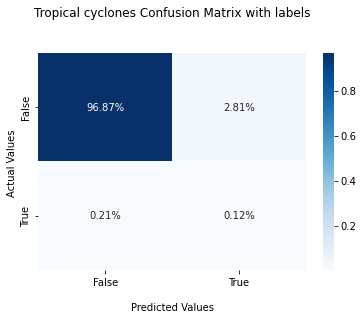

In [15]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Tropical cyclones Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [16]:
##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr005 = (model.predict(x_training)> 0.005).astype(int)
# Predict class labels on a test data
pred_labels_te005 = (model.predict(x_test)> 0.005).astype(int)
#> 0.01).astype(int)

##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
for layer in model.layers:
    print("Layer: ", layer.name) # print layer name
    
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_training, pred_labels_tr005))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te005))
print("")



-------------------- Model Summary --------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 8)                 0         
_________________________________________________________________
Hidden-Layer (Dense)         (None, 8)                 72        
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
Output-Layer (Dense)         (None, 1)                 9         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________

-------------------- Weights and Biases --------------------
Layer:  flatten
Layer:  Hidden-Layer
Layer:  dropout
Layer:  Output-Layer

---------- Evaluation on Training Data ----------
              

In [17]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, pred_labels_te005)

print(cf_matrix)


[[521636  16096]
 [  1090    665]]


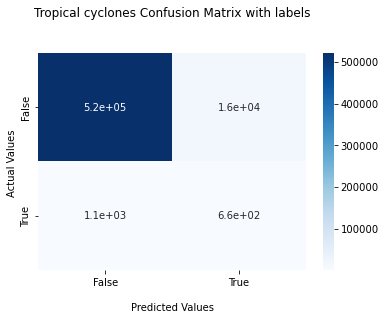

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Tropical cyclones Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

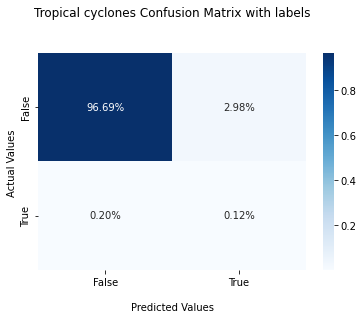

In [19]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Tropical cyclones Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()